The original data is csv but with utf8 code so the normal read_csv wont work

# Data Processing 

To make a quick clarification, it mentions cases here. The cases are the confirmed cases (not the actual cases)

#### Read File 

In [2]:
# Open a csv utf8 code 
with open('country_death.csv') as f:
  text = f.read()
data = text
df = pd.DataFrame([x.split(',') for x in data.split('\n')])

# The first row is the name of the columns 
a = df.iloc[0]

#Problem: The last column of the DF has NaN values 
a = a[:10]
a= a.append(pd.Series(['Remove']))               
df.columns = a
df= df.drop([0])
df= df.drop(['Remove' ],axis=1)


df.head(100)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
1,16/04/2020,16,4,2020,70,2,Afghanistan,AF,AFG,37172386
2,15/04/2020,15,4,2020,49,2,Afghanistan,AF,AFG,37172386
3,14/04/2020,14,4,2020,58,3,Afghanistan,AF,AFG,37172386
4,13/04/2020,13,4,2020,52,0,Afghanistan,AF,AFG,37172386
5,12/4/2020,12,4,2020,34,3,Afghanistan,AF,AFG,37172386
...,...,...,...,...,...,...,...,...,...,...
96,2/1/2020,2,1,2020,0,0,Afghanistan,AF,AFG,37172386
97,1/1/2020,1,1,2020,0,0,Afghanistan,AF,AFG,37172386
98,31/12/2019,31,12,2019,0,0,Afghanistan,AF,AFG,37172386
99,16/04/2020,16,4,2020,19,1,Albania,AL,ALB,2866376


#### Clean the data

Because the original data is in string value so I change it in order to graph and make it easier to calculate

In [3]:
## Change the type of the variable from String to Int 
df['cases'] = pd.to_numeric(df['cases'])
df['deaths'] = pd.to_numeric(df['deaths'])
df['popData2018'] = pd.to_numeric(df['popData2018'])
df['month'] = pd.to_numeric(df['month'])
df['day'] = pd.to_numeric(df['day'])


# Group by country 
region = df.groupby(['countriesAndTerritories'])
region_name = region.groups.keys()
#print(region_name)

####  Function 

The time conversion is to help creating a series of continuous time from 12/31/2019 up until 4/16/2020

In [5]:
# Convert day and months into a Month - unit time 
def time_conversion(day,month): 
    time_series= []
    thirty_month = [4,6,9,11]# months have 30 days
    thirtyone_month =[1,3,5,7,8,10,12]#months have 31 days 
    for i in range(0,len(month)):
        if int(month[i]) in thirty_month:
            number = (day[i]-1)/30 + month[i]
        elif int(month[i]) in thirtyone_month:
            number = (day[i]-1)/31 + month[i]
        else: 
            number = (day[i]-1)/28 + month[i]
        number = round(number,3)
        time_series.append(number)
    return time_series



# Country Analysis 

We pick USA, Italy and Spain because those are the countries that currently have the most COVID 19 cases. The list of analysis might expand. I create tables (data frame) for each mentioned country by grouping them coording to the countries' names. For each country, the columns have: time, popData2018, Total Deaths, Total Cases. 

(*) The difference between "cases"/ "deaths" vs "total cases"/ "total deaths" is: the "cases"/"deaths" is the number of cases/deaths happenning in that day; and "the total cases"/ "total deaths" are the total number of cases/deaths in that day

## USA

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,Total Deaths,Total Cases,Time,Population 2019
0,31/12/2019,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,0.000,329131338.0
1,1/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.000,329131338.0
2,2/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.032,329131338.0
3,3/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.065,329131338.0
4,4/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.097,329131338.0
5,5/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.129,329131338.0
6,6/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.161,329131338.0
7,7/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.194,329131338.0
8,8/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.226,329131338.0
9,9/1/2020,0.0,0.0,United_States_of_America,US,USA,0.0,0.0,1.258,329131338.0


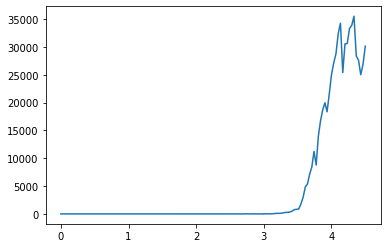

In [7]:
# Build the data frame
usa_pop= 329131338.0
usa = df[df['countriesAndTerritories'] == 'United_States_of_America']
#usa['dateRep'] = pd.to_datetime(usa['dateRep'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')
usa = usa.iloc[::-1] #flips the time so that first index will be in Jan
usa_index= pd.Series(list(range(0,len(usa)))) #change the index 
usa = usa.set_index(usa_index)

#Create new column for the df 
usa['Total Deaths']= usa['deaths'].cumsum()
usa['Total Cases']=usa['cases'].cumsum()
usa['Time']= time_conversion(usa['day'],usa['month'])
usa['Time'][0] = 0.0
usa['Population 2019']= [usa_pop]*len(usa)

#Remove unneccesary columns from the original data (such as day, month, year)
usa = usa.drop(["day", "month", "year","popData2018"], axis=1)

#Write USA data in CSV file 
plt.plot(usa['Time'],usa['cases'])
usa.head(20)

## Italy 

In [6]:
#build the data frame
italy_pop=60550075.0
italy = df[df['countriesAndTerritories'] == 'Italy']
italy = italy.iloc[::-1] 
italy_index= pd.Series(list(range(0,len(italy))))
italy = italy.set_index(italy_index)

#Create new columns for the df
italy['Total Deaths']= italy['deaths'].cumsum()
italy['Total Cases']=italy['cases'].cumsum()
italy['Time']= time_conversion(italy['day'],italy['month'])
italy['Time'][0]=0.0
italy['Population 2019']= [italy_pop]*len(italy)

#Remove unneccesary columns from the original data (such as day, month, year)
italy = italy.drop(["day", "month", "year","popData2018"], axis=1)


italy.head(20)

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,Total Deaths,Total Cases,Time,Population 2019
0,31/12/2019,0.0,0.0,Italy,IT,ITA,0.0,0.0,0.000,60550075.0
1,1/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.000,60550075.0
2,2/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.032,60550075.0
3,3/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.065,60550075.0
4,4/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.097,60550075.0
5,5/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.129,60550075.0
6,6/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.161,60550075.0
7,7/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.194,60550075.0
8,8/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.226,60550075.0
9,9/1/2020,0.0,0.0,Italy,IT,ITA,0.0,0.0,1.258,60550075.0


## Spain 

In [7]:
#Build the data
spain_pop= 47736776.0
spain = df[df['countriesAndTerritories'] == 'Spain']
spain = spain.iloc[::-1] 
spain_index= pd.Series(list(range(0,len(spain))))
spain = spain.set_index(spain_index)

#Create new columns for the df
spain['Total Deaths']= spain['deaths'].cumsum()
spain['Total Cases']=spain['cases'].cumsum()
spain['Time']= time_conversion(spain['day'],spain['month'])
spain['Time'][0]=0.0
spain['Population 2019']=[spain_pop]*len(spain)



#Remove unneccesary columns from the original data (such as day, month, year)
spain = spain.drop(["day", "month", "year","popData2018"], axis=1)


spain.head(20)

C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,Total Deaths,Total Cases,Time,Population 2019
0,31/12/2019,0.0,0.0,Spain,ES,ESP,0.0,0.0,0.000,47736776.0
1,1/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.000,47736776.0
2,2/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.032,47736776.0
3,3/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.065,47736776.0
4,4/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.097,47736776.0
5,5/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.129,47736776.0
6,6/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.161,47736776.0
7,7/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.194,47736776.0
8,8/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.226,47736776.0
9,9/1/2020,0.0,0.0,Spain,ES,ESP,0.0,0.0,1.258,47736776.0


### Creating Variables  (death and confirmed cases) 

In [8]:
#Convert date + month in to decimal 
time= usa['Time'].tolist()
time[0]=0
#y_index = pd.Series(list(range(0,len(y_time))))
#y_time = y_time.reindex(y_index)

# USA 
# Create X total cases variable
#usa_cases = usa[usa['Total Cases'] != 0]
usa_cases= usa['Total Cases'].tolist()


#Create X total deaths variable 
#usa_deaths = usa[usa['Total Deaths'] != 0]         #this show when the deaths > 0 
usa_deaths= usa['Total Deaths'].tolist()


#Italy 
# Create X total cases variable
#italy_cases = italy[italy['Total Cases'] != 0]
italy_cases= italy['Total Cases'].tolist()

#Create X total deaths variable 
#italy_deaths = italy[italy['Total Deaths'] != 0]
italy_deaths= italy['Total Deaths'].tolist()


#Spain 
# Create X total cases variable
#spain_cases = spain[spain['Total Cases'] != 0]
spain_cases= spain['Total Cases'].tolist()

#Create X total deaths variable 
#spain_deaths = spain[spain['Total Deaths'] != 0]
spain_deaths= spain['Total Deaths'].tolist()



# Plot the data for USA, Spain, Italy 

### Plot 1: Time vs Deaths 

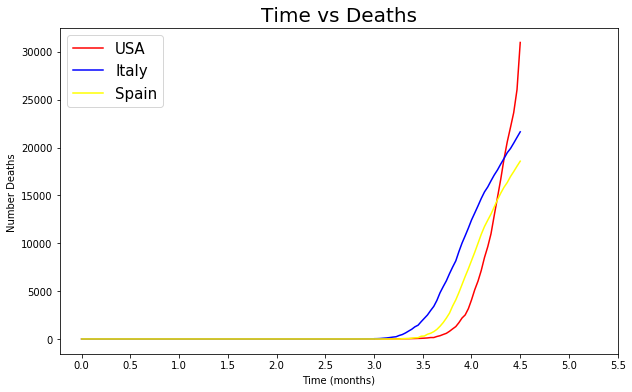

In [9]:
#Create the scale for the time value (x - axis)
x_scale = [i for i in np.arange(0,6,0.5)]

#Plotting Time vs Deaths
plt.figure(figsize=(10,6)) 
plt.title('Time vs Deaths',fontsize=20)
plt.plot(time,usa_deaths,color='red', label="USA")
plt.plot(time,italy_deaths, color= 'blue', label='Italy')
plt.plot(time,spain_deaths,color='yellow', label='Spain')
plt.xticks(x_scale)
plt.xlabel('Time (months)')
plt.ylabel('Number Deaths ')
plt.legend(prop={"size":15})
plt.show()

### Plot 2: Time vs Confirmed Cases 

### New Dataframe

As you can see in the graph, there exist exponential growth in every single lines which is a non linear regression model. I want to do an auto correlation analysis on both the deaths and the confirmed cases. However, the autocorrelation works only with LRM. Therefore, I would have to truncate the initial range due to its significant compared with the rest of the data. This would make us create more meaningful result. 

- America would now start at month > 3.5
- Italy starts at month > 3 
- Spain start at month > 3.1 


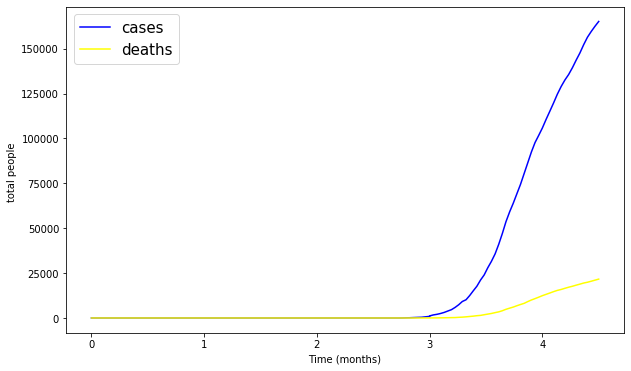

In [19]:
usa2 = usa[usa['Time'] >= 3.0]
italy2 = italy[italy['Time'] >= 2.75]
spain2= spain[spain['Time'] >= 3.1]
usa2.to_csv('USA_Deaths_and_Confirmed_Cases.csv')
spain2.to_csv('Spain_Deaths_and_Confirmed_Cases.csv')
italy2.to_csv('Italy_Deaths_and_Confirmed_Cases.csv')
#Plot function
def plot_function(data):
    plt.figure(figsize=(10,6)) 
    plt.plot(data['Time'],data['Total Cases'], color= 'blue', label='cases')
    plt.plot(data['Time'],data['Total Deaths'],color='yellow', label='deaths')
#plt.xticks(x_scale)
    plt.xlabel('Time (months)')
    plt.ylabel('total people ')
    plt.legend(prop={"size":15})
    plt.show()

plot_function(italy)

Get rid off outliners 

### Plot 3: Time vs Percentage of deaths over population 

.iloc to explicity support only integer indexing , and .loc to explicity support only label indexing (manually label columns)

In [12]:
#100 percent calculation 
percent_const = [100.0]*len(time)
percent_const = pd.Series(percent_const)

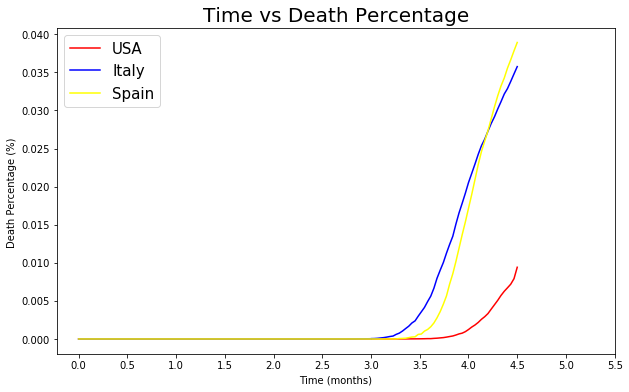

In [13]:
#Plotting Time vs Percentage of Deaths
plt.figure(figsize=(10,6)) 
plt.title('Time vs Death Percentage',fontsize=20)
usa_deaths_percent=usa_deaths*percent_const/usa['Population 2019'] 
italy_deaths_percent=italy_deaths*percent_const/italy['Population 2019']
spain_deaths_percent=spain_deaths*percent_const/spain['Population 2019']
plt.plot(time,usa_deaths_percent,color='red', label="USA")
plt.plot(time,italy_deaths_percent, color= 'blue', label='Italy')
plt.plot(time,spain_deaths_percent,color='yellow', label='Spain')
plt.xticks(x_scale)
plt.xlabel('Time (months)')
plt.ylabel('Death Percentage (%) ')
plt.legend(prop={"size":15})
plt.show()

### Plot 4: Time vs Percentage of Cases over population 

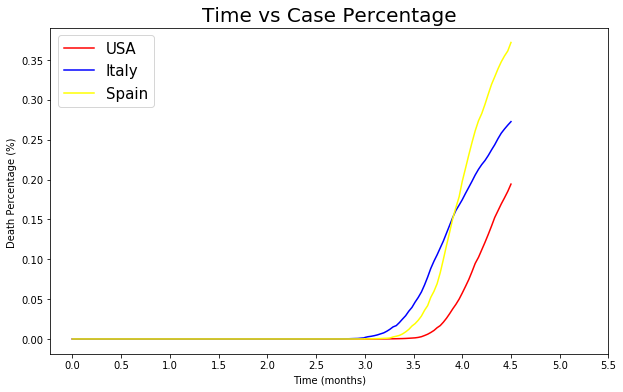

In [14]:
#Plotting Time vs Percentage of Cases
plt.figure(figsize=(10,6)) 
plt.title('Time vs Case Percentage',fontsize=20)
usa_cases_percent=usa_cases*percent_const/usa['Population 2019'] 
italy_cases_percent=italy_cases*percent_const/italy['Population 2019']
spain_cases_percent=spain_cases*percent_const/spain['Population 2019']
plt.plot(time,usa_cases_percent,color='red', label="USA")
plt.plot(time,italy_cases_percent, color= 'blue', label='Italy')
plt.plot(time,spain_cases_percent,color='yellow', label='Spain')
plt.xticks(x_scale)
plt.xlabel('Time (months)')
plt.ylabel('Death Percentage (%) ')
plt.legend(prop={"size":15})
plt.show()

## Linear Regression 

#### Create functions to plot and create variables (NEED TO BE RENAMED)


In [15]:
# Determine outliners range
def get_outliner_value(data):
    sorted(data)
    q1, q3= np.percentile(data,[15,100])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    outliner_bound = [lower_bound,upper_bound]
    return outliner_bound
def data_frame(df,strng):    #Create dataframe that meets with the conditions 
    y_df = df[df[strng] != 0] 
    index = list(y_df.index)
    x_time_df=  df['Time'].truncate(before=index[0])
    df = {" ".join([strng, 'Y']): y_df[strng], 'Time X': x_time_df}
    df = pd.DataFrame(df)
    df_index= pd.Series(list(range(0,len(index))))
    df = df.set_index(df_index)
    return df
def obtain_coef(model,n):
    b0 = pd.Series([model.intercept_]*n)
    b1 = pd.Series([model.coef_[0]]*n)
    b_model ={'b0': b0,'b1':b1}
    b_model = pd.DataFrame(b_model)
    return b_model
#def cal_error(model)
    #Update the data frame with e_t and e_(t-1) value 
def plot_data(df,strng,country_name):
    plt.figure(figsize=(10,6)) 
    plt.title(" ".join(['Time vs', strng,'-',country_name]),fontsize=20)
    plt.plot(df['Time X'],df[" ".join([strng, 'Y'])], color = 'black', label = 'original value')
    plt.plot(df['Time X'], df[" ".join(['Fitted',strng, 'Y hat'])],color = 'yellow', label ='fitted value')
    plt.xlabel('Time (months)')
    plt.ylabel(strng)
    plt.legend(prop={"size":15})
    plt.show()

#### USA: Time vs Deaths 

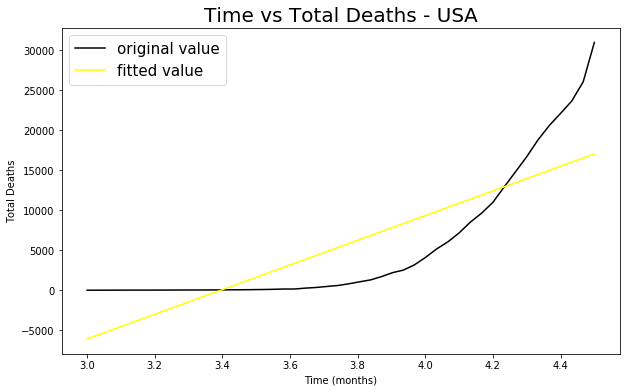

,Total Deaths Y,Time X,Fitted Total Deaths Y hat
0,1.0,3.000,-6098.967253
1,2.0,3.032,-5605.189460
2,6.0,3.065,-5095.981111
3,9.0,3.097,-4602.203319
4,11.0,3.129,-4108.425526
5,12.0,3.161,-3614.647733
6,14.0,3.194,-3105.439384
7,17.0,3.226,-2611.661591
8,21.0,3.258,-2117.883799
9,26.0,3.290,-1624.106006


In [16]:
# Create a data frame with X = times when the first death happen; Y = number of deaths 
df_usa_d = data_frame(usa,'Total Deaths')
#outliner_usa_d = get_outliner_value(df_usa_d['Total Deaths Y'])
#print(outliner_usa_d)
#Fit the data in the LRM 
model_usa_dth = LinearRegression().fit(np.array(df_usa_d['Time X']).reshape((-1,1)),np.array(df_usa_d['Total Deaths Y']))

#Find beta for LRM
coef_usa_dth = obtain_coef(model_usa_dth,len(df_usa_d))
 
#Update Y_hat for the data frame 
df_usa_d['Fitted Total Deaths Y hat'] = df_usa_d['Time X']*coef_usa_dth['b1']+ coef_usa_dth['b0']

# Plot USA Time vs Deaths with fitted lines 
plot_usa_d = plot_data(df_usa_d,'Total Deaths','USA')

df_usa_d.head(20)

